In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import HousingSalePrice.csv
housing_df = pd.read_csv('HousingSalePrice.csv')
# Import NewListings2.csv
newlist2 = pd.read_csv('NewListings2.csv')


In [4]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Data Cleaning**

In [5]:
housing_df.shape, newlist2.shape

((1399, 81), (61, 81))

In [6]:
# get only feature with null and its counts
def get_col_with_na(df):
    null_counts = df.isnull().sum()

    cols_with_missing = df.columns[df.isnull().any()]
    null_counts_filtered = null_counts[cols_with_missing]
    print(null_counts_filtered)

In [7]:
# housig df
get_col_with_na(housing_df)

LotFrontage      249
Alley           1313
MasVnrType         8
MasVnrArea         8
BsmtQual          36
BsmtCond          36
BsmtExposure      37
BsmtFinType1      36
BsmtFinType2      37
Electrical         1
FireplaceQu      663
GarageType        77
GarageYrBlt       77
GarageFinish      77
GarageQual        77
GarageCond        77
PoolQC          1393
Fence           1133
MiscFeature     1346
dtype: int64


In [8]:
# newlist2 df
get_col_with_na(newlist2)

LotFrontage     10
Alley           56
BsmtQual         1
BsmtCond         1
BsmtExposure     1
BsmtFinType1     1
BsmtFinType2     1
FireplaceQu     27
GarageType       4
GarageYrBlt      4
GarageFinish     4
GarageQual       4
GarageCond       4
PoolQC          60
Fence           46
MiscFeature     60
dtype: int64


From the support document, every NA values doesn't means null, i will handle  column per column  based on its meaning

**1. Column : LotFrontage means**
: Linear feet of street connected to property

In [9]:
# function check dtpes and NA counts on columns and both dataframes.
def check_data_details(df1, df2, column_name):
    
    print(f"housing_df[{column_name}]:")
    print(f"dtypes: {df1[column_name].dtype}, NA COUNTS: {df1[column_name].isnull().sum()}")
    
    print(f"newlist2[{column_name}]:")
    print(f"dtypes: {df2[column_name].dtype}, NA COUNTS: {df2[column_name].isnull().sum()}")
    
    

In [10]:
# LotFrontage with 249 NA, LotFrontage: Linear feet of street connected to property
check_data_details(housing_df, newlist2,'LotFrontage')

housing_df[LotFrontage]:
dtypes: float64, NA COUNTS: 249
newlist2[LotFrontage]:
dtypes: float64, NA COUNTS: 10


In [11]:
# Numerical variable we will fill na with means
def fill_missing_with_mean(df1, df2, column_name):
    df1[column_name].fillna(df1[column_name].mean() , inplace=True)
    df2[column_name].fillna(df1[column_name].mean(), inplace=True)


In [12]:
# filna with mean 
fill_missing_with_mean(housing_df, newlist2,'LotFrontage')
    

**2. Column: Alley** means Type of alley access to property.

NA: No alley access

In [13]:
# dtypes and NA counts
check_data_details(housing_df, newlist2,'Alley')


housing_df[Alley]:
dtypes: object, NA COUNTS: 1313
newlist2[Alley]:
dtypes: object, NA COUNTS: 56


In [14]:
# unique values on both dataframes
housing_df['Alley'].unique(),newlist2['Alley'].unique()

(array([nan, 'Grvl', 'Pave'], dtype=object),
 array([nan, 'Grvl', 'Pave'], dtype=object))

In [15]:
# map specifics keysword to a categorical column
def map_keywords_to_null(df1, df2, column_name, keywords):  
    df1[column_name].fillna(keywords, inplace=True)
    df2[column_name].fillna(keywords, inplace=True)


In [16]:
#  NA with No Alley 
map_keywords_to_null(housing_df, newlist2,'Alley', 'No Alley')

**3. Column: MasVnrType** means Masonry veneer type.

NA Means Null Values

In [17]:
housing_df['MasVnrType'].unique(),newlist2['MasVnrType'].unique()

(array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object),
 array(['None', 'Stone', 'BrkFace'], dtype=object))

In [18]:
check_data_details(housing_df, newlist2,'MasVnrType')

housing_df[MasVnrType]:
dtypes: object, NA COUNTS: 8
newlist2[MasVnrType]:
dtypes: object, NA COUNTS: 0


In [19]:
#  Fill NA in columns with the mode
def fill_missing_with_mode(df1, df2, column_name):
    df1[column_name].fillna(df1[column_name].mode()[0], inplace=True)
    df2[column_name].fillna(df1[column_name].mode()[0], inplace=True)


In [20]:
# for NA IN MasVnrType column, i decide to fill Na with most frequent value as the missing are few.
fill_missing_with_mode(housing_df, newlist2, 'MasVnrType')

**4. Column: FireplaceQu** means Fireplace quality.


In [21]:
check_data_details(housing_df, newlist2,'FireplaceQu')

housing_df[FireplaceQu]:
dtypes: object, NA COUNTS: 663
newlist2[FireplaceQu]:
dtypes: object, NA COUNTS: 27


In [22]:
#  Fill with the Most Frequent Value
fill_missing_with_mode(housing_df, newlist2,'FireplaceQu')

**5. Column: PoolQC** means pool quality.

 NA: No Pool

In [23]:
check_data_details(housing_df, newlist2,'PoolQC')

housing_df[PoolQC]:
dtypes: object, NA COUNTS: 1393
newlist2[PoolQC]:
dtypes: object, NA COUNTS: 60


In [24]:
map_keywords_to_null(housing_df, newlist2,'PoolQC', 'No Pool')

**6. Column: Fence** means Fence quality .
NA: No Fence          

In [25]:
check_data_details(housing_df, newlist2,'Fence')

housing_df[Fence]:
dtypes: object, NA COUNTS: 1133
newlist2[Fence]:
dtypes: object, NA COUNTS: 46


In [26]:
map_keywords_to_null(housing_df, newlist2,'Fence', 'No Fence')

**7. Column: MiscFeature** means Miscellaneous feature not covered in other categories. NA: Non

In [27]:
check_data_details(housing_df, newlist2, 'MiscFeature')

housing_df[MiscFeature]:
dtypes: object, NA COUNTS: 1346
newlist2[MiscFeature]:
dtypes: object, NA COUNTS: 60


In [28]:
map_keywords_to_null(housing_df, newlist2,'BsmtQual', 'None')

In [29]:
newlist2.shape

(61, 81)

**8. Column: BsmtQual** means Evaluates the height of the basement. NA: No Basement

In [30]:
check_data_details(housing_df, newlist2, 'BsmtQual')

housing_df[BsmtQual]:
dtypes: object, NA COUNTS: 0
newlist2[BsmtQual]:
dtypes: object, NA COUNTS: 0


In [31]:
map_keywords_to_null(housing_df, newlist2,'BsmtQual', 'No Basement')

**9. Column: BsmtCond** means  Evaluates the general condition of the basement. NA: No Basement

In [32]:
check_data_details(housing_df, newlist2, 'BsmtCond')

housing_df[BsmtCond]:
dtypes: object, NA COUNTS: 36
newlist2[BsmtCond]:
dtypes: object, NA COUNTS: 1


In [33]:
map_keywords_to_null(housing_df, newlist2,'BsmtCond', 'No Basement')

**10. Column:BsmtExposure** means Refers to walkout or garden level walls. NA: No Basement

In [34]:
check_data_details(housing_df, newlist2, 'BsmtExposure')

housing_df[BsmtExposure]:
dtypes: object, NA COUNTS: 37
newlist2[BsmtExposure]:
dtypes: object, NA COUNTS: 1


In [35]:
map_keywords_to_null(housing_df, newlist2,'BsmtExposure', 'No Basement')

**10. Column:BsmtFinType1** means  Rating of basement finished area. NA: No Basement

In [36]:
check_data_details(housing_df, newlist2, 'BsmtFinType1')

housing_df[BsmtFinType1]:
dtypes: object, NA COUNTS: 36
newlist2[BsmtFinType1]:
dtypes: object, NA COUNTS: 1


In [37]:
map_keywords_to_null(housing_df, newlist2,'BsmtFinType1', 'No Basement')

**11. Column:BsmtFinType2** means  Rating of basement finished area (if multiple types), NA: No Basement

In [38]:
check_data_details(housing_df, newlist2, 'BsmtFinType2')

housing_df[BsmtFinType2]:
dtypes: object, NA COUNTS: 37
newlist2[BsmtFinType2]:
dtypes: object, NA COUNTS: 1


In [39]:
map_keywords_to_null(housing_df, newlist2,'BsmtFinType2', 'No Basement')

**11. Column:GarageType** means  Garage location NA: No Garage

In [40]:
check_data_details(housing_df, newlist2, 'GarageType')

housing_df[GarageType]:
dtypes: object, NA COUNTS: 77
newlist2[GarageType]:
dtypes: object, NA COUNTS: 4


In [41]:
map_keywords_to_null(housing_df, newlist2,'GarageType', 'No Garage')

**12. Column:GarageYrBlt** means  Garage location NA: null

In [42]:
check_data_details(housing_df, newlist2, 'GarageYrBlt')

housing_df[GarageYrBlt]:
dtypes: float64, NA COUNTS: 77
newlist2[GarageYrBlt]:
dtypes: float64, NA COUNTS: 4


In [43]:
# NA mean non. fill na with mode 
fill_missing_with_mode(housing_df, newlist2, 'GarageYrBlt')

**13. Column:GarageFinish** means Interior finish of the garage NA: No Garage

In [44]:
check_data_details(housing_df, newlist2, 'GarageFinish')

housing_df[GarageFinish]:
dtypes: object, NA COUNTS: 77
newlist2[GarageFinish]:
dtypes: object, NA COUNTS: 4


In [45]:
# NA mean non. fill na with mode 
map_keywords_to_null(housing_df, newlist2,'GarageFinish', 'No Garage')

**13. Column:GarageQual** means Garage quality NA: No Garage

In [46]:
check_data_details(housing_df, newlist2, 'GarageQual')

housing_df[GarageQual]:
dtypes: object, NA COUNTS: 77
newlist2[GarageQual]:
dtypes: object, NA COUNTS: 4


In [47]:
map_keywords_to_null(housing_df, newlist2,'GarageQual', 'No Garage')

**14. Column:GarageCond** means Garage condition NA: No Garage

In [48]:
check_data_details(housing_df, newlist2, 'GarageCond')

housing_df[GarageCond]:
dtypes: object, NA COUNTS: 77
newlist2[GarageCond]:
dtypes: object, NA COUNTS: 4


In [49]:
map_keywords_to_null(housing_df, newlist2,'GarageCond', 'No Garage')

In [50]:
check_data_details(housing_df, newlist2, 'MasVnrArea')

housing_df[MasVnrArea]:
dtypes: float64, NA COUNTS: 8
newlist2[MasVnrArea]:
dtypes: int64, NA COUNTS: 0


In [51]:
fill_missing_with_mode(housing_df, newlist2,'MasVnrArea')

For Electrical and MiscFeature   i will drop this columns

In [52]:
get_col_with_na(housing_df)

Electrical        1
MiscFeature    1346
dtype: int64


In [53]:
newlist2.shape


(61, 81)

In [54]:
housing_df.shape

(1399, 81)

In [55]:
get_col_with_na(newlist2)

MiscFeature    60
dtype: int64


In [56]:
housing_df.drop(columns=['Electrical', 'MiscFeature'], inplace=True)
newlist2.drop(columns=['Electrical', 'MiscFeature'], inplace=True)

In [57]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,12,2008,WD,Normal,250000


In [58]:
# id as index
housing_df.set_index('Id', inplace=True)

newlist2.set_index('Id', inplace=True)

#### Outliers detection

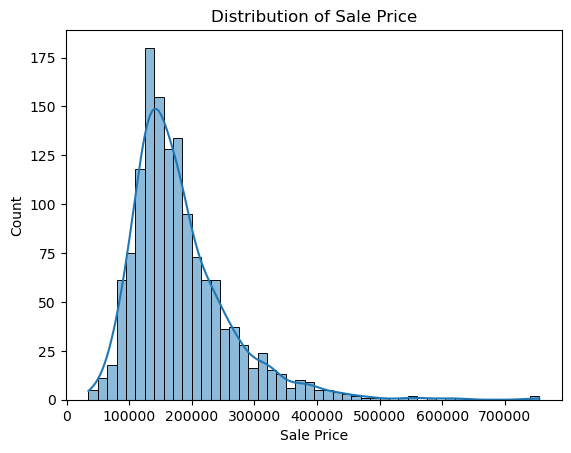

In [59]:
#  Distribution of SalePrice

sns.histplot(housing_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

The distribution of sale prices is right-skewed, meaning a few homes sold for very high prices. Most houses fall between 100K and 300K.

#####  let handle outliers with IQR

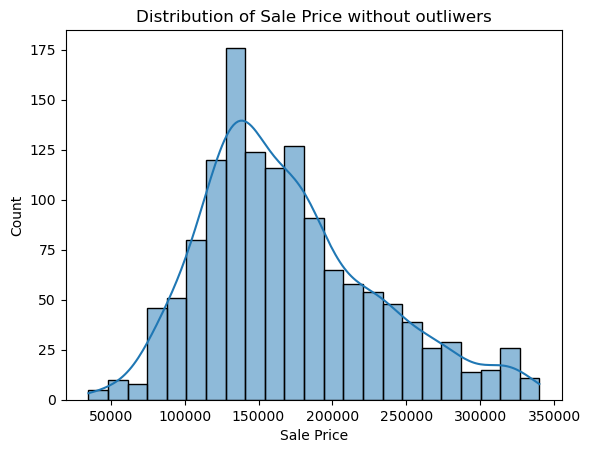

In [60]:
# sales Price
Q3,Q1 = np.percentile(housing_df['SalePrice'],[75,25])
UL = Q3 + 1.5*(Q3-Q1)
LL = Q1 - 1.5*(Q3-Q1)

housing_df = housing_df[(housing_df['SalePrice']<=UL) & (housing_df['SalePrice']>=LL)]


#  Distribution of SalePrice without outliers
sns.histplot(housing_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price without outliwers')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()


#### Features selection

In [61]:
# let check corr with  SalePrice,on numerical featuere
correlation = housing_df.corr()['SalePrice'].sort_values(ascending=False)
correlation

SalePrice        1.000000
OverallQual      0.782747
GrLivArea        0.659348
GarageCars       0.630403
GarageArea       0.609844
FullBath         0.577717
YearBuilt        0.568540
YearRemodAdd     0.546634
TotalBsmtSF      0.545063
1stFlrSF         0.522805
TotRmsAbvGrd     0.474867
Fireplaces       0.450690
GarageYrBlt      0.395646
MasVnrArea       0.342189
OpenPorchSF      0.320042
2ndFlrSF         0.313451
WoodDeckSF       0.310269
LotFrontage      0.300327
BsmtFinSF1       0.286727
HalfBath         0.282312
LotArea          0.249659
BsmtUnfSF        0.226352
BedroomAbvGr     0.201506
BsmtFullBath     0.201407
ScreenPorch      0.111599
MoSold           0.069037
3SsnPorch        0.044555
PoolArea         0.029102
BsmtFinSF2       0.016128
MiscVal         -0.019026
BsmtHalfBath    -0.024749
YrSold          -0.031431
OverallCond     -0.045914
MSSubClass      -0.057956
LowQualFinSF    -0.062745
KitchenAbvGr    -0.144381
EnclosedPorch   -0.145364
Name: SalePrice, dtype: float64

In [62]:
top_features = correlation[correlation > 0.55].index.tolist()
# selected feature
top_features.remove('SalePrice')
numerical_features = housing_df[top_features]
numerical_features.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath',
       'YearBuilt'],
      dtype='object')

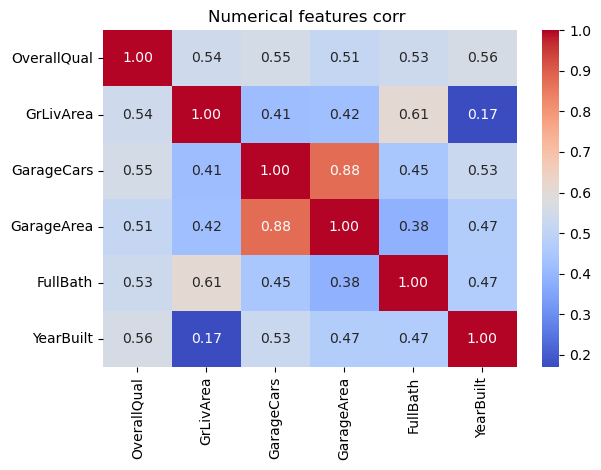

In [63]:
# correlation matrix
corr = numerical_features.corr(numeric_only=True)


sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Numerical features corr ")
plt.tight_layout()
plt.show()

**GarageArea** will be dropped due to its high correlation with **GarageCars** (0.87), as both represent similar information. 

###   visualization

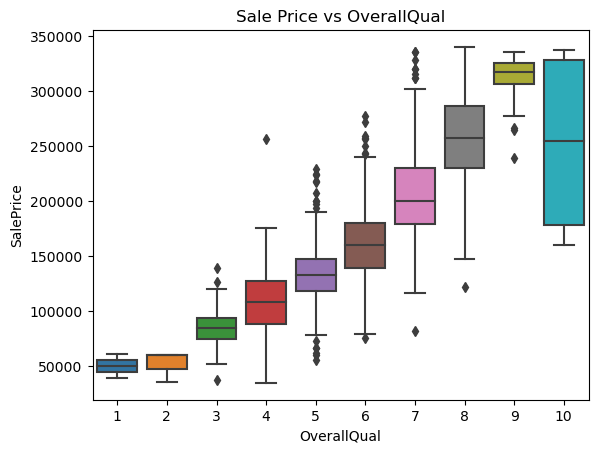

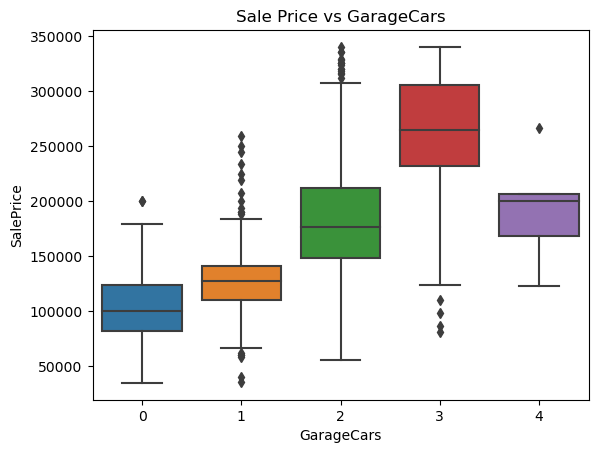

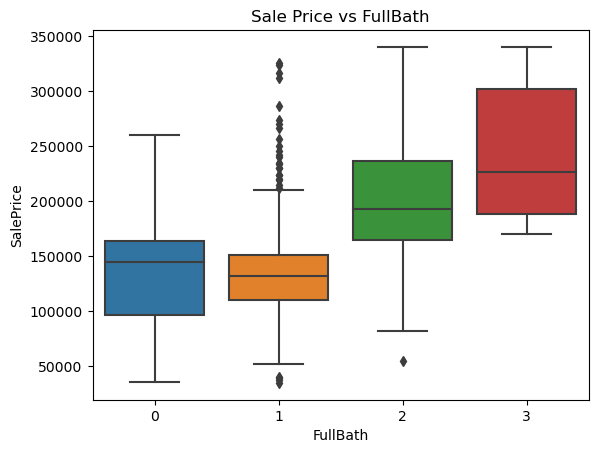

In [64]:
#  Boxplots of Top Features vs SalePrice
top_categorical = ['OverallQual', 'GarageCars', 'FullBath']
for col in top_categorical:
    sns.boxplot(x=col, y='SalePrice', data=housing_df)
    plt.title(f'Sale Price vs {col}')
    plt.show()


**Insight**

1. Homes with higher overall quality consistently sell for higher prices. 
2. The number of garage cars strongly impacts sale price, Homes with 2 or 3 garage result in higher sale pricesprices. 
3. Full bathrooms positively impact sale price.

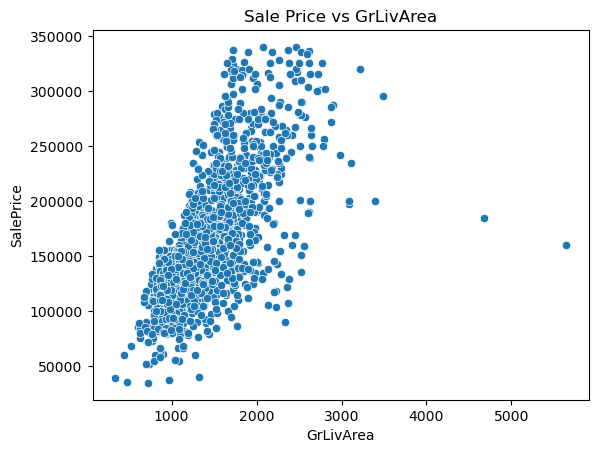

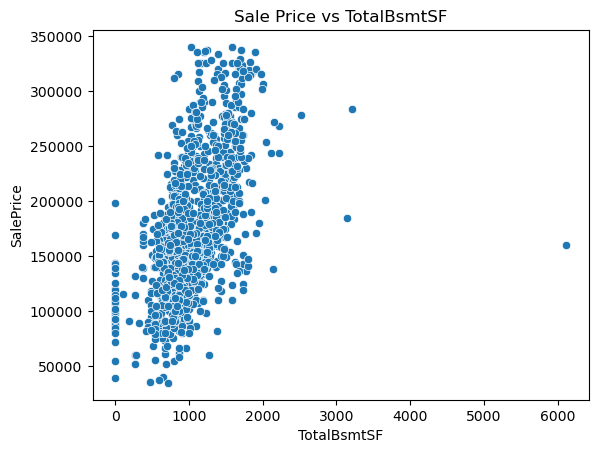

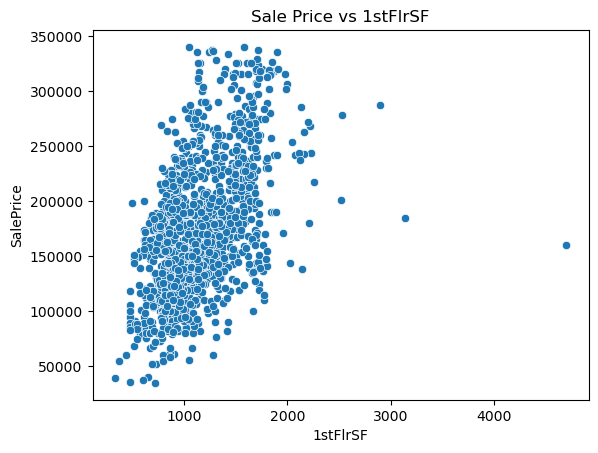

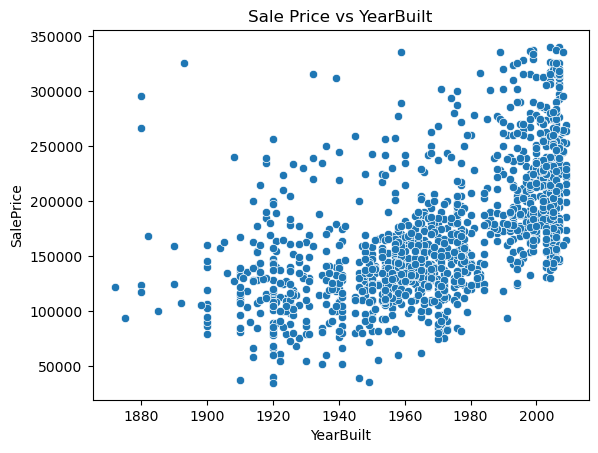

In [65]:
# Scatterplots for Continuous Features
top_numerical = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF','YearBuilt'] # i decide to eleminate GarageArea because it higher correlated to GarageCars.
for col in top_numerical:
    sns.scatterplot(x=col, y='SalePrice', data=housing_df)
    plt.title(f'Sale Price vs {col}')
    plt.show()

**Insight**

1. Living area and first-floor area both show positive correlation with sale price.
2. Basement area and garage area also contribute positively.
3. Garage area shows moderate positive correlation with sale price, but decide to leave as its the same as variable garagecars


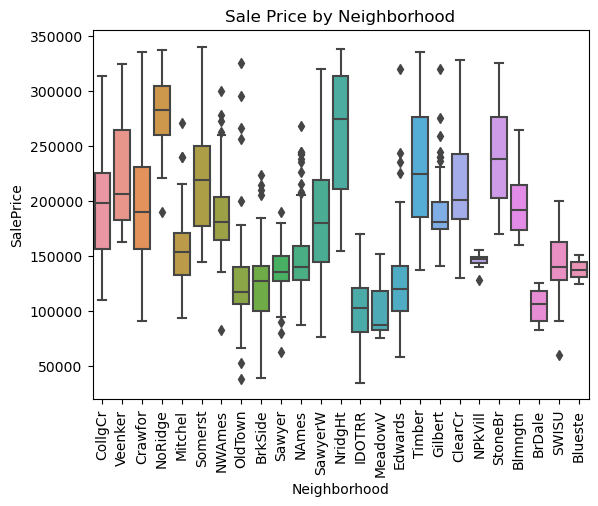

In [66]:
# Categorical Feature: 
# 1. Neighborhood Impact

sns.boxplot(x='Neighborhood', y='SalePrice', data=housing_df)
plt.xticks(rotation=90)
plt.title('Sale Price by Neighborhood')
plt.show()

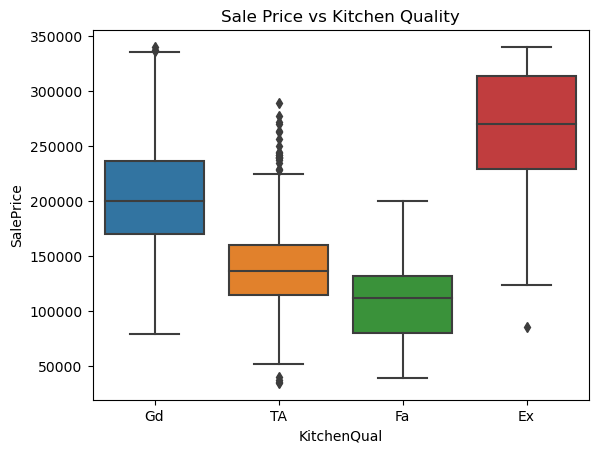

In [67]:

sns.boxplot(data=housing_df, x='KitchenQual', y='SalePrice')
plt.title("Sale Price vs Kitchen Quality")
plt.show()


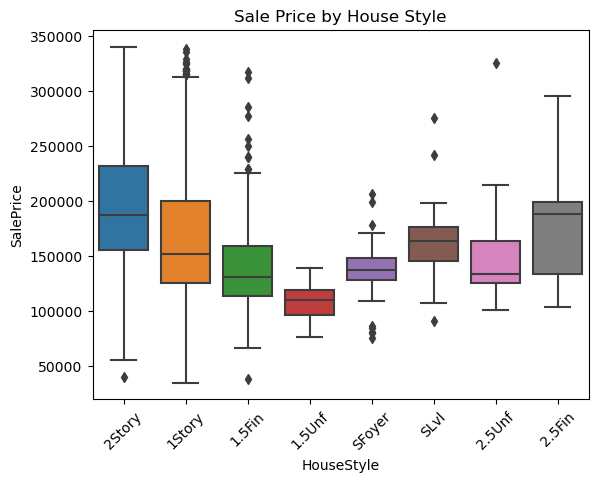

In [68]:

sns.boxplot(data=housing_df, x='HouseStyle', y='SalePrice')
plt.xticks(rotation=45)
plt.title("Sale Price by House Style")
plt.show()

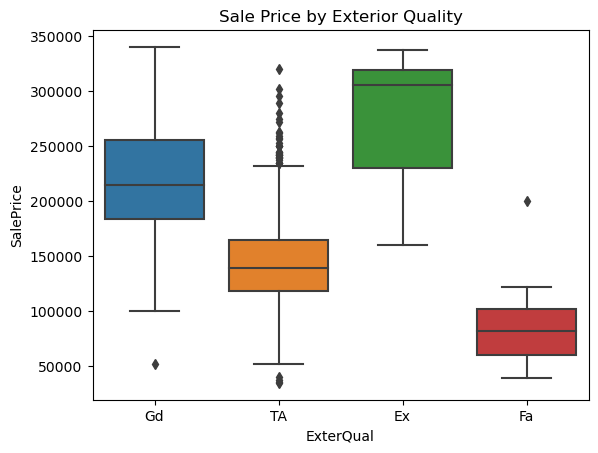

In [69]:

sns.boxplot(data=housing_df, x='ExterQual', y='SalePrice')
plt.title("Sale Price by Exterior Quality")
plt.show()

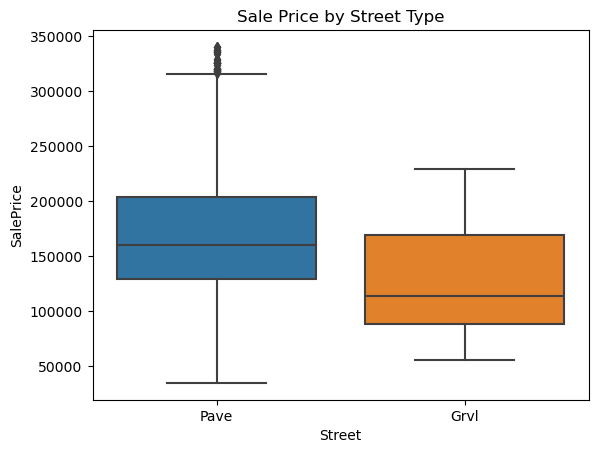

In [70]:
# Sale Price vs Street

sns.boxplot(data=housing_df, x='Street', y='SalePrice')
plt.title("Sale Price by Street Type")
plt.show()


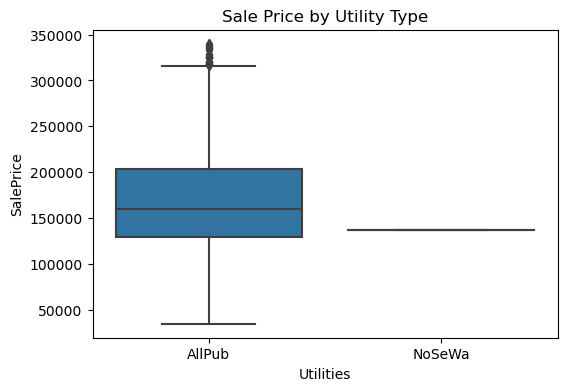

In [71]:
# Sale Price vs Utilities
plt.figure(figsize=(6, 4))
sns.boxplot(data=housing_df, x='Utilities', y='SalePrice')
plt.title("Sale Price by Utility Type")
plt.show()


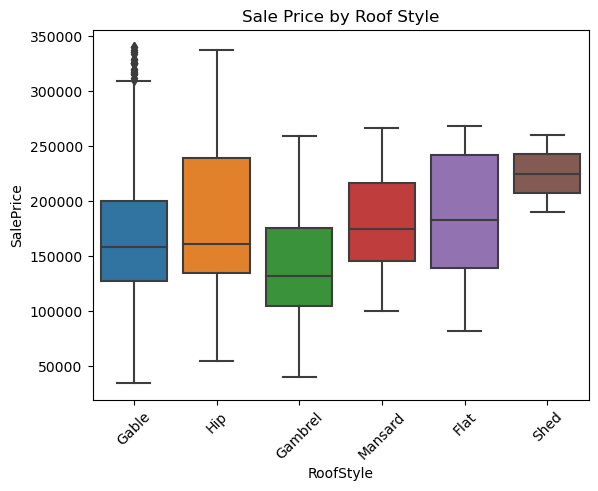

In [72]:

sns.boxplot(data=housing_df, x='RoofStyle', y='SalePrice')
plt.xticks(rotation=45)
plt.title("Sale Price by Roof Style")
plt.show()


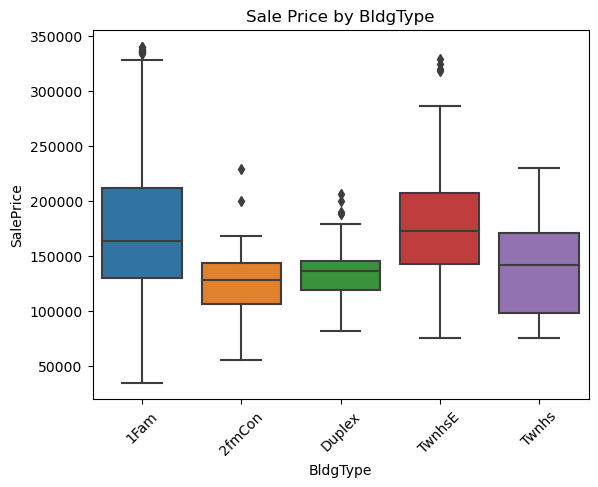

In [73]:

sns.boxplot(data=housing_df, x='BldgType', y='SalePrice')
plt.xticks(rotation=45)
plt.title("Sale Price by BldgType")
plt.show()


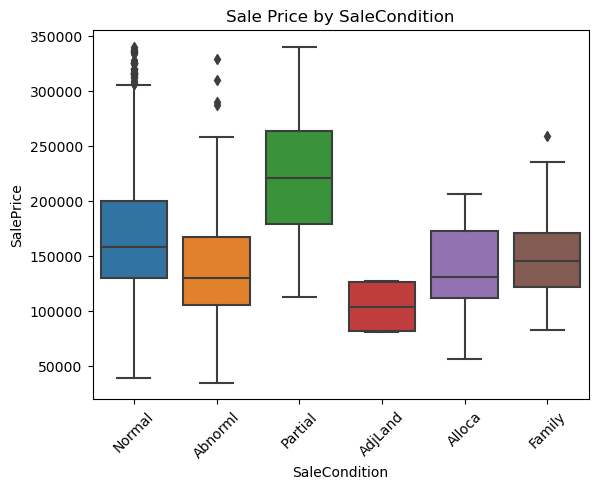

In [74]:

sns.boxplot(data=housing_df, x='SaleCondition', y='SalePrice')
plt.xticks(rotation=45)
plt.title("Sale Price by SaleCondition")
plt.show()

**Insight**
1. Sale prices significantly by neighborhood,  some consistently have higher sale prices  NridgHt, StoneBr), while others are lower (OldTown, BrkSide, IDOTRR). 
2. Homes with Excellent kitchen quality and exterior finish ratings (Ex or Gd) tend to sell for more.
3. 2Story and 1Story homes sell better than split-level or unfinished attic homes. 
4. Homes rated Excellent (Ex) or Good (Gd) for exterior finish tend to sell at higher prices.
5. Roof styles like Hip and Gable may also influence higher pricing.

### Feature engineering

In [75]:
numerical_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath','YearBuilt']
categorical_features = ['Neighborhood', 'HouseStyle', 'BldgType','ExterQual', 'KitchenQual', 'BsmtQual'] 

selected_features = numerical_features + categorical_features + ['SalePrice']

housing_selected_df = housing_df[selected_features]
newlist2_selected_df =newlist2[numerical_features + categorical_features+ ['Desired Price']] # to be used in deployment with 'Desired Price'


In [76]:
# deal with outlier on predictorS
df_cleaned = housing_selected_df.copy()

cols_to_check = ['GrLivArea', 'YearBuilt']

# Drop outliers based on IQR
for col in cols_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

df_cleaned.shape

(1312, 12)

In [77]:
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
#housing df
df_cleaned['ExterQual'] = df_cleaned['ExterQual'].map(quality_mapping)
df_cleaned['KitchenQual'] = df_cleaned['KitchenQual'].map(quality_mapping)
df_cleaned['BsmtQual'] = df_cleaned['BsmtQual'].map(quality_mapping)


In [78]:
#newlist
newlist2_selected_df['ExterQual'] = newlist2_selected_df['ExterQual'].map(quality_mapping)
newlist2_selected_df['KitchenQual'] = newlist2_selected_df['KitchenQual'].map(quality_mapping)
newlist2_selected_df['BsmtQual'] = newlist2_selected_df['BsmtQual'].map(quality_mapping)

In [79]:
# dummies for categorical

categorical_cols = ['Neighborhood', 'HouseStyle', 'BldgType']
df_final = pd.get_dummies(df_cleaned, columns=categorical_cols, prefix_sep='_')
newlist2_selected_df = pd.get_dummies(newlist2_selected_df, columns=categorical_cols, prefix_sep='_')



**Feature Selection**
features done based on:

1. Numerical correlation to SalePrice (threshold > 0.55)
2. Categorical features with strong impact identified through EDA
3. Final features include:
     1. Numerical: GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt
     2. Categorical: Neighborhood, HouseStyle, BldgType, ExterQual, KitchenQual, BsmtQual (converted to dummies andf other mapped)

### Modeling


In [80]:
# Separate features and target
X  = df_final.drop(columns=['SalePrice'])
Y = df_final['SalePrice']

In [81]:
# Train-Test Split

from sklearn.model_selection import train_test_split

size = newlist2_selected_df.shape
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size[0], random_state=101)

In [82]:

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


get the best degree of our model

In [83]:

from stargazer.stargazer import Stargazer, LineLocation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


train_rmse = []
test_rmse = []

# Loop through degrees 1 to 4
for deg in range(1, 5):
    #  polynomial features from scaled data
    poly_converter = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly_converter.fit_transform(X_train_scaled)
    X_test_poly = poly_converter.transform(X_test_scaled)

    # Fit linear regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

#best degree
best_degree = test_rmse.index(min(test_rmse)) + 1
print(f"\n Best Polynomial Degree: {best_degree} with Test RMSE: {min(test_rmse):.2f}")



 Best Polynomial Degree: 1 with Test RMSE: 21555.73


get the best alpha for ridge with out best degree

In [84]:

from sklearn.linear_model import RidgeCV

poly_converter = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly_converter.fit_transform(X_train_scaled)
X_test_poly = poly_converter.transform(X_test_scaled)

ply_model_L2_cv = RidgeCV(alphas=(0.001, 0.5, 0.99), scoring='neg_mean_squared_error', cv=10)
ply_model_L2_cv.fit(X_train_poly, y_train)

best_alpha_cv = ply_model_L2_cv.alpha_

# Step 5: Predict and evaluate on test set
y_pred_cv = ply_model_L2_cv.predict(X_test_poly)
rmse_cv = np.sqrt(mean_squared_error(y_test, y_pred_cv))

# Step 6: Print results
print(f"The Degree is  {best_degree} and the Optimal Alpha {best_alpha_cv} with {rmse_cv}")


The Degree is  1 and the Optimal Alpha 0.99 with 21542.487578450506


### Model Performance and Justification

To identify the effective model for predicting house sale prices, I trained and evaluated Polynomial Regression models with degrees ranging from 1 to 4 using scaled features. The goal was to find a model that achieves strong predictive accuracy, generalizes well to new data, and remains interpretable and practical for deployment.

After testing, Polynomial Regression with Degree 1 achieved the lowest test RMSE of 21,555.73, confirming that the relationship between the predictors and SalePrice is largely linear. Increasing the polynomial degree led to overfitting, I applied Ridge Regression and tuned the regularization parameter alpha using 10-fold cross-validation with RidgeCV. The optimal alpha was 0.99, which reduced the test RMSE further to 21,542.49, confirming that light regularization improves stability without sacrificing performance.

##### Why  Polynomial Degree 1 with Ridge of alpha 0.99  is the Best Fit:
- **Lowest test RMSE**  across all degree and alpha combinations
- linear structure (Degree = 1), easy to interpret
- Regularized (Alpha = 0.99) to prevent overfitting

In [91]:
# Save the Final Model

from joblib import dump, load
#  retraining using best degree and optimal alpha
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  polynomial converter and fit best model
final_poly_converter = PolynomialFeatures(degree=best_degree, include_bias=False)
final_model = Ridge(alpha=best_alpha_cv)
final_model.fit(final_poly_converter.fit_transform(X_scaled), Y)  

#  model, converter, and scaler
dump(final_model, 'models/house_salePrice/house_salePrice_prediction_model.joblib') 
dump(final_poly_converter, 'models/house_salePrice/poly_converter.joblib')
dump(scaler, 'models/house_salePrice/scaler.joblib')
dump(X.columns, 'models/house_salePrice/train_features.joblib')



['models/house_salePrice/train_features.joblib']

3. What house characteristics appear to be the most important determinants of the sale price? Based on these observations, what recommendations would you make to new sellers about how they can modify their house to improve the sale price? Show the regression results that you are using to make these recommendations. 



In [92]:
X_poly = final_poly_converter.transform(X_scaled)
feature_names = final_poly_converter.get_feature_names_out(input_features=X.columns)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_model.coef_
})


coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df_sorted.head(10)


,Feature,Coefficient
1,GrLivArea,25331.163024
0,OverallQual,13126.175405
4,YearBuilt,9642.464157
6,KitchenQual,6808.724348
7,BsmtQual,5449.351606
24,Neighborhood_NridgHt,4907.221932
35,HouseStyle_1Story,4362.199683
41,BldgType_1Fam,4347.026521
14,Neighborhood_Crawfor,4306.625735
2,GarageCars,4128.719296


Based on the model insights, **ways sellers can boost their homes sale price**:

1. Add More Living Space : Finish unused areas like the basement to increase total living space, it’s the strongest price booster.
2. Upgrade the Kitchen and Basement : Improving kitchen and basement quality to “Good” or “Excellent” can significantly raise your home’s value.
3. Improve Overall Quality: Small upgrades to materials that improve the overall feel of the home can lead to big gains.
4. Location If your home is in a high-demand neighborhood like *NridgHt* or *Crawfor*, be sure to highlight that in your listing.
5. Add Garage Space Extra garage spots are attractive to buyers and can directly increase sale price.


### Predictions and Recommandation

In [93]:
newlist2_selected_df

,OverallQual,GrLivArea,GarageCars,FullBath,YearBuilt,ExterQual,KitchenQual,BsmtQual,Desired Price,Neighborhood_Blmngtn,...,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
Id,,,,,,,,,,,,,,,,,,,,,
1400,6,1608,1,2,1925,3,4,3,127000,0,...,0,0,0,0,0,1,0,0,0,0
1401,6,1158,1,1,1929,3,3,3,112000,0,...,0,0,0,0,0,1,0,0,0,0
1402,6,1593,2,2,2004,3,3,3,196600,0,...,0,0,1,0,0,1,0,0,0,0
1403,7,1294,2,2,2006,4,4,4,201500,0,...,1,0,0,0,0,1,0,0,0,0
1404,8,1464,3,2,2007,4,4,4,283700,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1647,2,2,1999,3,3,4,174700,0,...,0,0,1,0,0,1,0,0,0,0
1457,6,2073,2,2,1978,3,3,4,209000,0,...,1,0,0,0,0,1,0,0,0,0
1458,7,2340,1,2,1941,5,4,3,254800,0,...,0,0,1,0,0,1,0,0,0,0


In [94]:


# Load the saved model components
model = load('models/house_salePrice/house_salePrice_prediction_model.joblib')
poly_converter = load('models/house_salePrice/poly_converter.joblib')
scaler = load('models/house_salePrice/scaler.joblib')
expected_features = load('models/house_salePrice/train_features.joblib')  # list of feature names used before training

# Drop target column and align features
X_new = newlist2_selected_df.drop(columns=['Desired Price'])
X_new_aligned = X_new.reindex(columns=expected_features, fill_value=0)

# Polynomial transform first (before scaling)
X_poly = poly_converter.transform(X_new_aligned)

#  scale
X_scaled = scaler.transform(X_poly)

# Predict
predicted_prices = model.predict(X_scaled)

#  predictions and recommendation
newlist2_selected_df['PredictedPrice'] = predicted_prices
newlist2_selected_df['Recommendation'] = newlist2_selected_df.apply(
    lambda row: 'Sell' if row['PredictedPrice'] >= row['Desired Price'] else 'Do Not Sell',axis=1)

# Step 6: Display with ID
result = newlist2_selected_df.reset_index()[['Id', 'Desired Price', 'PredictedPrice', 'Recommendation']]
result = result.set_index('Id')
result


,Desired Price,PredictedPrice,Recommendation
Id,,,
1400,127000,149447.124172,Sell
1401,112000,125436.469280,Sell
1402,196600,165046.587071,Do Not Sell
1403,201500,202051.001209,Sell
1404,283700,243180.914684,Do Not Sell
...,...,...,...
1456,174700,172989.456017,Do Not Sell
1457,209000,210942.642828,Sell
1458,254800,247726.360733,Do Not Sell


In [ ]:
#end